<a href="https://colab.research.google.com/github/jvbs013/Machine-Learning/blob/main/analytics/Analytics22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, r2_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from sklearn.metrics import log_loss

pd.set_option('display.max_columns', None)

test = pd.read_csv('/content/drive/MyDrive/Analytics2022/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Analytics2022/train.csv')

# 1° Pre processamento
AGE, GENDER, DRIVING_EXPERIENCE, EDUCATION, INCOME
VEHICLE_YEAR, ANNUAL_MILEAGE, SPEEDING_VIOLATIONS,
DUIS, PAST ACCIDENT, TYPE OF VEHICLE

## AGE

In [ ]:
train.AGE.value_counts()

40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: AGE, dtype: int64

In [ ]:
lista1 = train.loc[train['AGE'] == '16-25'].index.values
train.AGE.loc[lista1] = float(0.0)

lista2 = train.loc[train['AGE'] == '26-39'].index.values
train.AGE.loc[lista2] = float(1.0)

lista3 = train.loc[train['AGE'] == '40-64'].index.values
train.AGE.loc[lista3] = float(2.0)

lista4 = train.loc[train['AGE'] == '65+'].index.values
train.AGE.loc[lista4] = float(3.0)


lista1 = test.loc[test['AGE'] == '16-25'].index.values
test.AGE.loc[lista1] = float(0.0)

lista2 = test.loc[test['AGE'] == '26-39'].index.values
test.AGE.loc[lista2] = float(1.0)

lista3 = test.loc[test['AGE'] == '40-64'].index.values
test.AGE.loc[lista3] = float(2.0)

lista4 = test.loc[test['AGE'] == '65+'].index.values
test.AGE.loc[lista4] = float(3.0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## GENDER

In [ ]:
lista1 = train.loc[train['GENDER'] == 'female'].index.values
train.GENDER.loc[lista1] = float(0.0)

lista2 = train.loc[train['GENDER'] == 'male'].index.values
train.GENDER.loc[lista2] = float(1.0)

lista1 = test.loc[test['GENDER'] == 'female'].index.values
test.GENDER.loc[lista1] = float(0.0)

lista2 = test.loc[test['GENDER'] == 'male'].index.values
test.GENDER.loc[lista2] = float(1.0)

## DRIVING_EXPERIENCE

In [ ]:
train.DRIVING_EXPERIENCE.value_counts()

20-29y    37493
0-9y      33111
10-19y    25101
30y+       9295
Name: DRIVING_EXPERIENCE, dtype: int64

In [ ]:
lista1 = train.loc[train['DRIVING_EXPERIENCE'] == '0-9y'].index.values
train.DRIVING_EXPERIENCE.loc[lista1] = float(0.0)

lista2 = train.loc[train['DRIVING_EXPERIENCE'] == '10-19y'].index.values
train.DRIVING_EXPERIENCE.loc[lista2] = float(1.0)

lista3 = train.loc[train['DRIVING_EXPERIENCE'] == '20-29y'].index.values
train.DRIVING_EXPERIENCE.loc[lista3] = float(2.0)

lista4 = train.loc[train['DRIVING_EXPERIENCE'] == '30y+'].index.values
train.DRIVING_EXPERIENCE.loc[lista4] = float(3.0)


lista1 = test.loc[test['DRIVING_EXPERIENCE'] == '0-9y'].index.values
test.DRIVING_EXPERIENCE.loc[lista1] = float(0.0)

lista2 = test.loc[test['DRIVING_EXPERIENCE'] == '10-19y'].index.values
test.DRIVING_EXPERIENCE.loc[lista2] = float(1.0)

lista3 = test.loc[test['DRIVING_EXPERIENCE'] == '20-29y'].index.values
test.DRIVING_EXPERIENCE.loc[lista3] = float(2.0)

lista4 = test.loc[test['DRIVING_EXPERIENCE'] == '30y+'].index.values
test.DRIVING_EXPERIENCE.loc[lista4] = float(3.0)

## EDUCATION

In [ ]:
train.EDUCATION.value_counts()

high school    46590
university     31220
none           27190
Name: EDUCATION, dtype: int64

In [ ]:
lista1 = train.loc[train['EDUCATION'] == 'none'].index.values
train.EDUCATION.loc[lista1] = float(0.0)

lista2 = train.loc[train['EDUCATION'] == 'high school'].index.values
train.EDUCATION.loc[lista2] = float(1.0)

lista3 = train.loc[train['EDUCATION'] == 'university'].index.values
train.EDUCATION.loc[lista3] = float(2.0)


lista1 = test.loc[test['EDUCATION'] == 'none'].index.values
test.EDUCATION.loc[lista1] = float(0.0)

lista2 = test.loc[test['EDUCATION'] == 'high school'].index.values
test.EDUCATION.loc[lista2] = float(1.0)

lista3 = test.loc[test['EDUCATION'] == 'university'].index.values
test.EDUCATION.loc[lista3] = float(2.0)

## INCOME

In [ ]:
train.INCOME.value_counts()

upper class      51271
working class    24454
middle class     14738
poverty          14537
Name: INCOME, dtype: int64

In [ ]:
lista1 = train.loc[train['INCOME'] == 'poverty'].index.values
train.INCOME.loc[lista1] = float(0.0)

lista2 = train.loc[train['INCOME'] == 'working class'].index.values
train.INCOME.loc[lista2] = float(1.0)

lista3 = train.loc[train['INCOME'] == 'middle class'].index.values
train.INCOME.loc[lista3] = float(2.0)

lista4 = train.loc[train['INCOME'] == 'upper class'].index.values
train.INCOME.loc[lista4] = float(3.0)


lista1 = test.loc[test['INCOME'] == 'poverty'].index.values
test.INCOME.loc[lista1] = float(0.0)

lista2 = test.loc[test['INCOME'] == 'working class'].index.values
test.INCOME.loc[lista2] = float(1.0)

lista3 = test.loc[test['INCOME'] == 'middle class'].index.values
test.INCOME.loc[lista3] = float(2.0)

lista4 = test.loc[test['INCOME'] == 'upper class'].index.values
test.INCOME.loc[lista4] = float(3.0)

## VEHICLE_YEAR

In [ ]:
train.VEHICLE_YEAR.value_counts()

before 2015    57511
after 2015     47489
Name: VEHICLE_YEAR, dtype: int64

In [ ]:
lista1 = train.loc[train['VEHICLE_YEAR'] == 'before 2015'].index.values
train.VEHICLE_YEAR.loc[lista1] = float(0.0)

lista2 = train.loc[train['VEHICLE_YEAR'] == 'after 2015'].index.values
train.VEHICLE_YEAR.loc[lista2] = float(1.0)

lista1 = test.loc[test['VEHICLE_YEAR'] == 'before 2015'].index.values
test.VEHICLE_YEAR.loc[lista1] = float(0.0)

lista2 = test.loc[test['VEHICLE_YEAR'] == 'after 2015'].index.values
test.VEHICLE_YEAR.loc[lista2] = float(1.0)

## TYPE_OF_VEHICLE

In [ ]:
encoder = OneHotEncoder(drop='first')

encoder.fit(train[['TYPE_OF_VEHICLE']])
encoded_categories = encoder.transform(train[['TYPE_OF_VEHICLE']])

train_categories = pd.DataFrame(encoded_categories.toarray())
train_categories.columns = encoder.get_feature_names_out()
train = train.drop(columns=['TYPE_OF_VEHICLE'])
train = pd.concat([train, train_categories], axis=1)
train = train.rename(columns={'TYPE_OF_VEHICLE_SUV': 'CAR_SUV', 
                              'TYPE_OF_VEHICLE_Sedan': 'CAR_SEDAN', 
                              'TYPE_OF_VEHICLE_Sports Car': 'CAR_SPORTS'})


encoder = OneHotEncoder(drop='first')

encoder.fit(test[['TYPE_OF_VEHICLE']])
encoded_categories = encoder.transform(test[['TYPE_OF_VEHICLE']])

test_categories = pd.DataFrame(encoded_categories.toarray())
test_categories.columns = encoder.get_feature_names_out()
test = test.drop(columns=['TYPE_OF_VEHICLE'])
test = pd.concat([test, test_categories], axis=1)
test = test.rename(columns={'TYPE_OF_VEHICLE_SUV': 'CAR_SUV', 
                              'TYPE_OF_VEHICLE_Sedan': 'CAR_SEDAN', 
                              'TYPE_OF_VEHICLE_Sports Car': 'CAR_SPORTS'})

### Objet para float

In [ ]:
train['AGE'] = pd.to_numeric(train['AGE'])
train['GENDER'] = pd.to_numeric(train['GENDER'])
train['DRIVING_EXPERIENCE'] = pd.to_numeric(train['DRIVING_EXPERIENCE'])
train['EDUCATION'] = pd.to_numeric(train['EDUCATION'])
train['INCOME'] = pd.to_numeric(train['INCOME'])
train['VEHICLE_YEAR'] = pd.to_numeric(train['VEHICLE_YEAR'])

test['AGE'] = pd.to_numeric(test['AGE'])
test['GENDER'] = pd.to_numeric(test['GENDER'])
test['DRIVING_EXPERIENCE'] = pd.to_numeric(test['DRIVING_EXPERIENCE'])
test['EDUCATION'] = pd.to_numeric(test['EDUCATION'])
test['INCOME'] = pd.to_numeric(test['INCOME'])
test['VEHICLE_YEAR'] = pd.to_numeric(test['VEHICLE_YEAR'])

# 2° Pre processamento - Ajustando escalas

In [ ]:
df_final = train

df_final = df_final.assign(DS_PAS=0)
df_final = df_final.assign(PER_MILE=0)
for i in df_final.index.values:
  df_final.DS_PAS.loc[i] = df_final.DUIS.loc[i] + df_final.PAST_ACCIDENTS.loc[i] + df_final.SPEEDING_VIOLATIONS.loc[i]
  df_final.PER_MILE.loc[i] = df_final.DUIS.loc[i] / df_final.ANNUAL_MILEAGE.loc[i]


df_final_test = test

df_final_test = df_final_test.assign(DS_PAS=0)
df_final_test = df_final_test.assign(PER_MILE=0)
for i in df_final_test.index.values:
  df_final_test.DS_PAS.loc[i] = df_final_test.DUIS.loc[i] + df_final_test.PAST_ACCIDENTS.loc[i] + df_final_test.SPEEDING_VIOLATIONS.loc[i]
  df_final_test.PER_MILE.loc[i] = df_final_test.DUIS.loc[i] / df_final_test.ANNUAL_MILEAGE.loc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_df = df_final.columns

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df_final)
df_final = pd.DataFrame(scaler_data, columns = columns_df)

columns_df = df_final_test.columns

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df_final_test)
df_final_test = pd.DataFrame(scaler_data, columns = columns_df)

In [ ]:
# df_final = df_final.assign(CAR_TYPE=0)

# ids = df_final.loc[df_final['CAR_SUV'] == 1].index.values
# df_final.CAR_TYPE.loc[ids] = float(0.333333)

# ids = df_final.loc[df_final['CAR_SEDAN'] == 1].index.values
# df_final.CAR_TYPE.loc[ids] = float(0.666667)

# ids = df_final.loc[df_final['CAR_SPORTS'] == 1].index.values
# df_final.CAR_TYPE.loc[ids] = float(1.0)

# df_final = df_final.drop(columns=['CAR_SUV',	'CAR_SEDAN',	'CAR_SPORTS'], axis=1)


# df_final_test = df_final_test.assign(CAR_TYPE=0)

# ids = df_final_test.loc[df_final_test['CAR_SUV'] == 1].index.values
# df_final_test.CAR_TYPE.loc[ids] = float(0.333333)

# ids = df_final_test.loc[df_final_test['CAR_SEDAN'] == 1].index.values
# df_final_test.CAR_TYPE.loc[ids] = float(0.666667)

# ids = df_final_test.loc[df_final_test['CAR_SPORTS'] == 1].index.values
# df_final_test.CAR_TYPE.loc[ids] = float(1.0)

# df_final_test = df_final_test.drop(columns=['CAR_SUV',	'CAR_SEDAN',	'CAR_SPORTS'], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# 2°a Pre processamento

In [ ]:
train = train.drop(columns=['ID', 'POSTAL_CODE'])
test = test.drop(columns=['ID', 'POSTAL_CODE'])

In [ ]:
from sklearn.preprocessing import Normalizer

array = train.drop(columns=['OUTCOME']).values
array2 = test.values

# Separando o array em componentes de input e output
X = array
Y = array[:,14]

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
df_norm = pd.DataFrame(normalizedX, columns=train.drop(columns=['OUTCOME']).columns)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", train.drop(columns=['OUTCOME']).values)
print("\nDados Normalizados: \n\n", normalizedX[0:5,:])

ValueError: ignored

In [ ]:
train

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CAR_SUV,CAR_SEDAN,CAR_SPORTS
0,2.0,0.0,2.0,2.0,2.0,0.638050,0.0,1.0,0.0,0.0,11000.0,0,0,0,0.0,0.0,0.0,1.0
1,1.0,1.0,2.0,1.0,2.0,0.475741,1.0,0.0,1.0,0.0,9000.0,0,0,0,1.0,0.0,0.0,0.0
2,2.0,1.0,2.0,0.0,2.0,0.839817,1.0,0.0,1.0,1.0,12000.0,0,0,0,1.0,0.0,1.0,0.0
3,2.0,1.0,2.0,1.0,3.0,0.682527,1.0,0.0,0.0,1.0,6000.0,1,0,0,1.0,0.0,1.0,0.0
4,2.0,0.0,2.0,0.0,1.0,0.572184,1.0,1.0,1.0,1.0,15000.0,0,0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,3.0,0.0,0.0,1.0,3.0,0.672255,1.0,0.0,0.0,0.0,9000.0,2,0,0,0.0,1.0,0.0,0.0
104996,2.0,0.0,0.0,0.0,1.0,0.514193,1.0,1.0,1.0,0.0,10000.0,0,0,0,1.0,0.0,1.0,0.0
104997,0.0,1.0,1.0,0.0,3.0,0.461942,1.0,1.0,1.0,0.0,11000.0,0,0,0,1.0,0.0,1.0,0.0
104998,2.0,0.0,2.0,1.0,1.0,0.483571,1.0,0.0,0.0,0.0,10000.0,0,0,0,0.0,0.0,0.0,0.0


# 2°b Pre processamento

In [ ]:
categorical_columns = ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME']

encoder = OneHotEncoder(drop='first')
categorical_encoded = encoder.fit_transform(train[categorical_columns])

categorical_encoded_train = pd.DataFrame(categorical_encoded.toarray(), 
                                      columns = encoder.get_feature_names_out())

encoder = OneHotEncoder(drop='first')
categorical_encoded_test = encoder.fit_transform(test[categorical_columns])

categorical_encoded_test = pd.DataFrame(categorical_encoded.toarray(), 
                                      columns = encoder.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import StandardScaler

array = train[['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS']].values
array2 = test[['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS']].values

# Separando o array em componentes de input e output
X = array

Xt = array2

# Gerando os dados normalizados
scaler = StandardScaler().fit(X)
normalizedX = scaler.transform(X)
df_norm = pd.DataFrame(normalizedX, columns=['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS'])

scaler = StandardScaler().fit(Xt)
normalizedXt = scaler.transform(Xt)
df_norm_test = pd.DataFrame(normalizedXt, columns=['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS'])

## Juntando train + categorical + numerical

In [ ]:
unchanged_df = train[['GENDER','VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'OUTCOME', 'CAR_SUV', 'CAR_SEDAN', 'CAR_SPORTS']]

df_final = pd.concat([categorical_encoded_train,
                      df_norm,
                      unchanged_df], axis=1)

df_final_test = pd.concat([categorical_encoded_test,
                      df_norm_test,
                      unchanged_df], axis=1)

# 3° Pre processamento - Mixing variables

In [ ]:
(df_final.corr()['OUTCOME']**2).sort_values(ascending=False)

OUTCOME                1.000000e+00
GENDER                 1.367303e-04
DRIVING_EXPERIENCE     9.417315e-05
CAR_SPORTS             5.869671e-05
CAR_SUV                4.616244e-05
MARRIED                3.633267e-05
CAR_SEDAN              3.295483e-05
EDUCATION              9.691023e-06
VEHICLE_OWNERSHIP      9.447384e-06
CREDIT_SCORE           9.413424e-06
POSTAL_CODE            7.845781e-06
AGE                    6.197360e-06
ID                     5.679413e-06
PAST_ACCIDENTS         5.489110e-06
CHILDREN               3.494344e-06
ANNUAL_MILEAGE         1.218798e-06
VEHICLE_YEAR           7.337082e-07
DUIS                   1.461702e-07
INCOME                 9.538065e-08
SPEEDING_VIOLATIONS    2.282213e-08
Name: OUTCOME, dtype: float64

## SPEEDING_VIOLATIONS x DUIS

In [ ]:
df_final.DUIS.value_counts()

0.000000    98246
0.166667     3430
0.333333     1219
0.500000     1069
0.666667      709
0.833333      251
1.000000       76
Name: DUIS, dtype: int64

In [ ]:
df_final.INCOME.value_counts()

1.000000    51271
0.333333    24454
0.666667    14738
0.000000    14537
Name: INCOME, dtype: int64

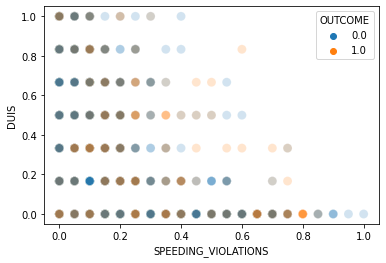

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

dft = df_final[['SPEEDING_VIOLATIONS', 'DUIS', 'OUTCOME']]

x = df_final['SPEEDING_VIOLATIONS']
y = df_final['DUIS']

sns.scatterplot(data=dft, x=x, y=y , hue='OUTCOME', s=80, alpha=0.2)

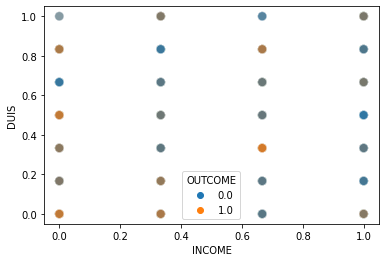

In [ ]:
dft = df_final[['INCOME', 'DUIS', 'OUTCOME']]

x = df_final['INCOME']
y = df_final['DUIS']

sns.scatterplot(data=dft, x=x, y=y , hue='OUTCOME', s=80, alpha=0.2)

In [ ]:
df_final.loc[(df_final['INCOME'] == 0) & (df_final['DUIS'] == 1)]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CAR_SUV,CAR_SEDAN,CAR_SPORTS
5120,0.7952,1.0000,0.0,0.0000,0.5,0.0,0.5822,1.0,1.0,0.0,1.0,0.000,0.5263,0.00,1.0,0.0,0.0,0.0,0.0,1.0
9610,0.3843,0.0000,0.0,0.0000,1.0,0.0,0.4827,1.0,0.0,1.0,1.0,0.000,0.3684,0.05,1.0,0.0,1.0,0.0,1.0,0.0
19383,0.2157,0.6667,1.0,0.0000,0.0,0.0,0.8468,1.0,1.0,1.0,0.0,1.000,0.4211,0.05,1.0,0.0,0.0,0.0,0.0,0.0
29660,0.4698,1.0000,0.0,0.0000,0.5,0.0,0.6396,0.0,1.0,0.0,0.0,0.000,0.5263,0.00,1.0,0.0,1.0,0.0,0.0,1.0
74742,0.1758,0.6667,0.0,0.0000,1.0,0.0,0.6152,1.0,1.0,1.0,1.0,0.313,0.6842,0.05,1.0,0.0,0.0,0.0,0.0,0.0
100042,0.5159,0.3333,1.0,0.6667,0.5,0.0,0.5950,1.0,0.0,1.0,1.0,0.000,0.5789,0.00,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_final.loc[(df_final['VEHICLE_YEAR'] == 1) & (df_final['MARRIED'] == 0) & (df_final['CHILDREN'] == 0)]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,CAR_SUV,CAR_SEDAN,CAR_SPORTS
0,0.8164,0.6667,0.0,0.6667,1.0,0.6667,0.6438,0.0,1.0,0.0,0.0,0.3315,0.4737,0.00,0.0,0.0000,0.0,0.0,0.0,1.0
43,0.1003,0.0000,1.0,0.6667,1.0,0.3333,0.3592,1.0,1.0,0.0,0.0,0.0000,0.7368,0.15,0.0,0.0000,1.0,0.0,0.0,1.0
45,0.0392,0.6667,1.0,0.3333,0.5,0.3333,0.7542,0.0,1.0,0.0,0.0,0.0000,0.4211,0.05,0.0,0.1333,0.0,0.0,0.0,0.0
63,0.0437,0.6667,0.0,0.6667,0.0,1.0000,0.6691,1.0,1.0,0.0,0.0,0.0000,0.3158,0.00,0.0,0.0000,1.0,0.0,0.0,1.0
65,0.0754,1.0000,1.0,0.3333,0.5,1.0000,0.6831,1.0,1.0,0.0,0.0,0.0000,0.5263,0.00,0.0,0.0667,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104951,0.4285,1.0000,1.0,0.3333,0.5,1.0000,0.7766,0.0,1.0,0.0,0.0,0.3338,0.4211,0.00,0.0,0.0000,0.0,0.0,0.0,1.0
104952,0.0263,0.3333,1.0,0.6667,0.5,0.0000,0.4726,1.0,1.0,0.0,0.0,0.0000,0.6316,0.00,0.0,0.0667,0.0,0.0,1.0,0.0
104959,0.1970,0.3333,1.0,0.0000,1.0,0.6667,0.6456,0.0,1.0,0.0,0.0,0.0000,0.5789,0.10,0.0,0.0000,0.0,0.0,0.0,1.0
104966,0.0660,0.0000,1.0,0.6667,0.5,0.3333,0.7243,0.0,1.0,0.0,0.0,0.0000,0.3158,0.05,0.0,0.0000,0.0,0.0,0.0,1.0


In [ ]:
df_final_test.SPEEDING_VIOLATIONS = df_final_test.SPEEDING_VIOLATIONS.round(4)

In [ ]:
df_final_test.loc[(df_final_test['SPEEDING_VIOLATIONS'] == 0.8235) & (df_final_test['DUIS'] == 0)]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,CAR_SUV,CAR_SEDAN,CAR_SPORTS
1981,0.9898,0.6667,1.0,0.0000,1.0,0.3333,0.4280,1.0,1.0,1.0,0.0,0.0000,0.5789,0.8235,0.0,0.0000,1.0,0.0,0.0
4571,0.3106,1.0000,1.0,0.6667,1.0,1.0000,0.5404,1.0,1.0,1.0,1.0,0.0000,0.3684,0.8235,0.0,0.0000,0.0,0.0,1.0
18887,0.3155,0.6667,1.0,0.0000,1.0,0.3333,0.8197,1.0,1.0,0.0,1.0,0.0000,0.6316,0.8235,0.0,0.0000,0.0,1.0,0.0
22360,0.4161,0.6667,1.0,0.6667,0.5,0.6667,0.7605,1.0,0.0,1.0,1.0,0.0000,0.4211,0.8235,0.0,0.0000,0.0,0.0,1.0
28444,0.9897,0.6667,1.0,0.6667,1.0,1.0000,0.7252,1.0,0.0,0.0,0.0,0.0000,0.6316,0.8235,0.0,0.0000,0.0,0.0,1.0
29683,0.2908,1.0000,1.0,1.0000,1.0,1.0000,0.6734,1.0,0.0,1.0,0.0,0.0000,0.5789,0.8235,0.0,0.0000,0.0,0.0,0.0
32661,0.1873,1.0000,1.0,0.6667,0.5,0.3333,0.7436,0.0,0.0,0.0,0.0,0.0000,0.4737,0.8235,0.0,0.0000,0.0,1.0,0.0
36874,0.3679,0.6667,1.0,0.0000,0.5,0.0000,0.4533,1.0,1.0,1.0,0.0,0.0000,0.6316,0.8235,0.0,0.1333,0.0,0.0,1.0
39967,0.0814,1.0000,1.0,0.6667,0.5,0.3333,0.3542,1.0,1.0,0.0,1.0,0.3012,0.6316,0.8235,0.0,0.3333,0.0,0.0,1.0


0.8>X>0.4 E  Y>0.4 -> outcome = 1
x

In [ ]:
for i in df_final.columns:
  temp = df_final.loc[(df_final['SPEEDING_VIOLATIONS'] == 0) & (df_final[i] == 0)]
  temp2 = df_final.loc[(df_final['SPEEDING_VIOLATIONS'] == 0) & (df_final[i] == 1)]
  print(i)
  print("0->",temp.OUTCOME.mean(), "tam:",len(temp.index))
  print("1->",temp2.OUTCOME.mean(), "tam:",len(temp2.index))
  print()

ID
0-> 0.3561643835616438 tam: 73
1-> 0.5 tam: 2

AGE
0-> 0.4201862321250416 tam: 12028
1-> 0.42505633997148506 tam: 21743

GENDER
0-> 0.43341966938371296 tam: 26254
1-> 0.41881656528933325 tam: 42909

DRIVING_EXPERIENCE
0-> 0.4223454470464232 tam: 21821
1-> 0.42672841548130996 tam: 6046

EDUCATION
0-> 0.4235208426714478 tam: 17848
1-> 0.42277653031338475 tam: 20486

INCOME
0-> 0.4304581097812629 tam: 9692
1-> 0.42451961628701257 tam: 33671

CREDIT_SCORE
0-> nan tam: 0
1-> 1.0 tam: 1

VEHICLE_OWNERSHIP
0-> 0.42725036056672605 tam: 11787
1-> 0.42376603457891804 tam: 57376

VEHICLE_YEAR
0-> 0.4247634279621485 tam: 37515
1-> 0.4238814459049545 tam: 31648

MARRIED
0-> 0.4254943991149219 tam: 28924
1-> 0.42354432267203457 tam: 40239

CHILDREN
0-> 0.42219823709300236 tam: 33354
1-> 0.4263732581194672 tam: 35809

POSTAL_CODE
0-> 0.42476093630834816 tam: 51137
1-> nan tam: 0

ANNUAL_MILEAGE
0-> 0.4576719576719577 tam: 378
1-> 0.0 tam: 3

SPEEDING_VIOLATIONS
0-> 0.42435984558217543 tam: 69163
1

## ANNUL MILAGE = 1 E DUIS =0

In [ ]:
df_final.loc[(df_final['DUIS'] == 0) & (df_final['SPEEDING_VIOLATIONS'] >= 0.5)].OUTCOME.mean()
## 0.45

0.4574780058651026

In [ ]:
temp = df_final.loc[(df_final['DUIS'] == 0) 
& (df_final['SPEEDING_VIOLATIONS'] == 0)
& (df_final['INCOME'] == 0)
& (df_final['VEHICLE_YEAR'] == 1)
& (df_final['CHILDREN'] == 1)]
indexes = temp.index.values


temp2 = df_final_test.loc[(df_final_test['DUIS'] == 0) 
& (df_final_test['SPEEDING_VIOLATIONS'] == 0)
& (df_final_test['INCOME'] == 0)
& (df_final_test['VEHICLE_YEAR'] == 1)
& (df_final['CHILDREN'] == 1)]
indexes2 = temp2.index.values

print("media:",temp.OUTCOME.mean())
print(len(temp.index))

media: 0.4404121863799283
2232


In [ ]:
df_final = df_final.assign(Duis_Spd_Inc_Vyear=0.5)
df_final_test = df_final_test.assign(Duis_Spd_Inc_Vyear=0.5)

In [ ]:
df_final.Duis_Spd_Inc_Vyear.loc[indexes] = 1.0
df_final_test.Duis_Spd_Inc_Vyear.loc[indexes2] = 1.0

In [ ]:
df_final = df_final.drop(columns=['Duis_Spd_Inc_Vyear'], axis=1)
df_final_test = df_final_test.drop(columns=['Duis_Spd_Inc_Vyear'], axis=1)

In [ ]:
df_final.Duis_Spd_Inc_Vyear.value_counts()

0.5    101609
0.0      3191
1.0       200
Name: Duis_Spd_Inc_Vyear, dtype: int64

## INCOME x VEHICLE_YEAR

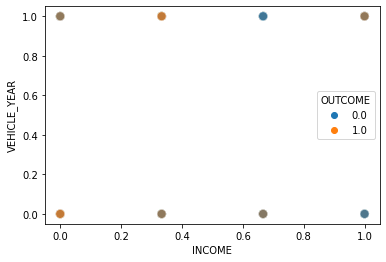

In [ ]:
dft = df_final[['INCOME', 'VEHICLE_YEAR', 'OUTCOME']]

x = df_final['INCOME']
y = df_final['VEHICLE_YEAR']

sns.scatterplot(data=dft, x=x, y=y , hue='OUTCOME', s=80, alpha=0.2)

# 3°b Pre processamento
BALANCEAR OUTCOME

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
df_final.OUTCOME.value_counts()

0.0    60622
1.0    44378
Name: OUTCOME, dtype: int64

In [ ]:
X = df_final[['AGE',	'GENDER',	'DRIVING_EXPERIENCE',	'EDUCATION',	'INCOME',	
              'CREDIT_SCORE',	'VEHICLE_OWNERSHIP',	'VEHICLE_YEAR',	'MARRIED',	
              'CHILDREN', 'ANNUAL_MILEAGE',	'SPEEDING_VIOLATIONS',	'DUIS',	
              'PAST_ACCIDENTS',	'CAR_SUV',	'CAR_SEDAN',	'CAR_SPORTS']]
y = df_final['OUTCOME']

# over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.75)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = under.fit_resample(X, y)

In [ ]:
y.value_counts()

0.0    59170
1.0    44378
Name: OUTCOME, dtype: int64

In [ ]:
df_balanced_classes = pd.concat([X,y],axis=1)

In [ ]:
df_balanced_classes

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,CAR_SUV,CAR_SEDAN,CAR_SPORTS,OUTCOME
0,0.000000,1.0,0.666667,0.5,1.000000,0.570494,1.0,0.0,0.0,0.0,0.421053,0.00,0.0,0.133333,0.0,0.0,0.0,0.0
1,0.333333,1.0,0.666667,0.0,0.333333,0.478307,1.0,0.0,1.0,1.0,0.578947,0.00,0.0,0.066667,0.0,1.0,0.0,0.0
2,1.000000,1.0,0.666667,0.0,0.333333,0.683099,1.0,1.0,0.0,1.0,0.631579,0.05,0.0,0.000000,0.0,0.0,1.0,0.0
3,0.666667,1.0,0.000000,0.5,1.000000,0.572023,0.0,0.0,1.0,1.0,0.684211,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
4,1.000000,1.0,0.000000,1.0,0.666667,0.394935,0.0,0.0,1.0,1.0,0.578947,0.00,0.0,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103543,1.000000,1.0,0.333333,0.5,0.000000,0.501550,1.0,0.0,1.0,1.0,0.210526,0.05,0.0,0.000000,0.0,0.0,1.0,1.0
103544,0.666667,0.0,1.000000,0.5,0.333333,0.493358,1.0,0.0,1.0,1.0,0.578947,0.00,0.0,0.066667,0.0,0.0,1.0,1.0
103545,0.666667,0.0,0.000000,0.0,0.333333,0.504188,1.0,1.0,1.0,0.0,0.421053,0.00,0.0,0.000000,0.0,1.0,0.0,1.0
103546,0.000000,1.0,0.333333,0.0,1.000000,0.445293,1.0,1.0,1.0,0.0,0.473684,0.00,0.0,0.000000,0.0,1.0,0.0,1.0


# Pairplot

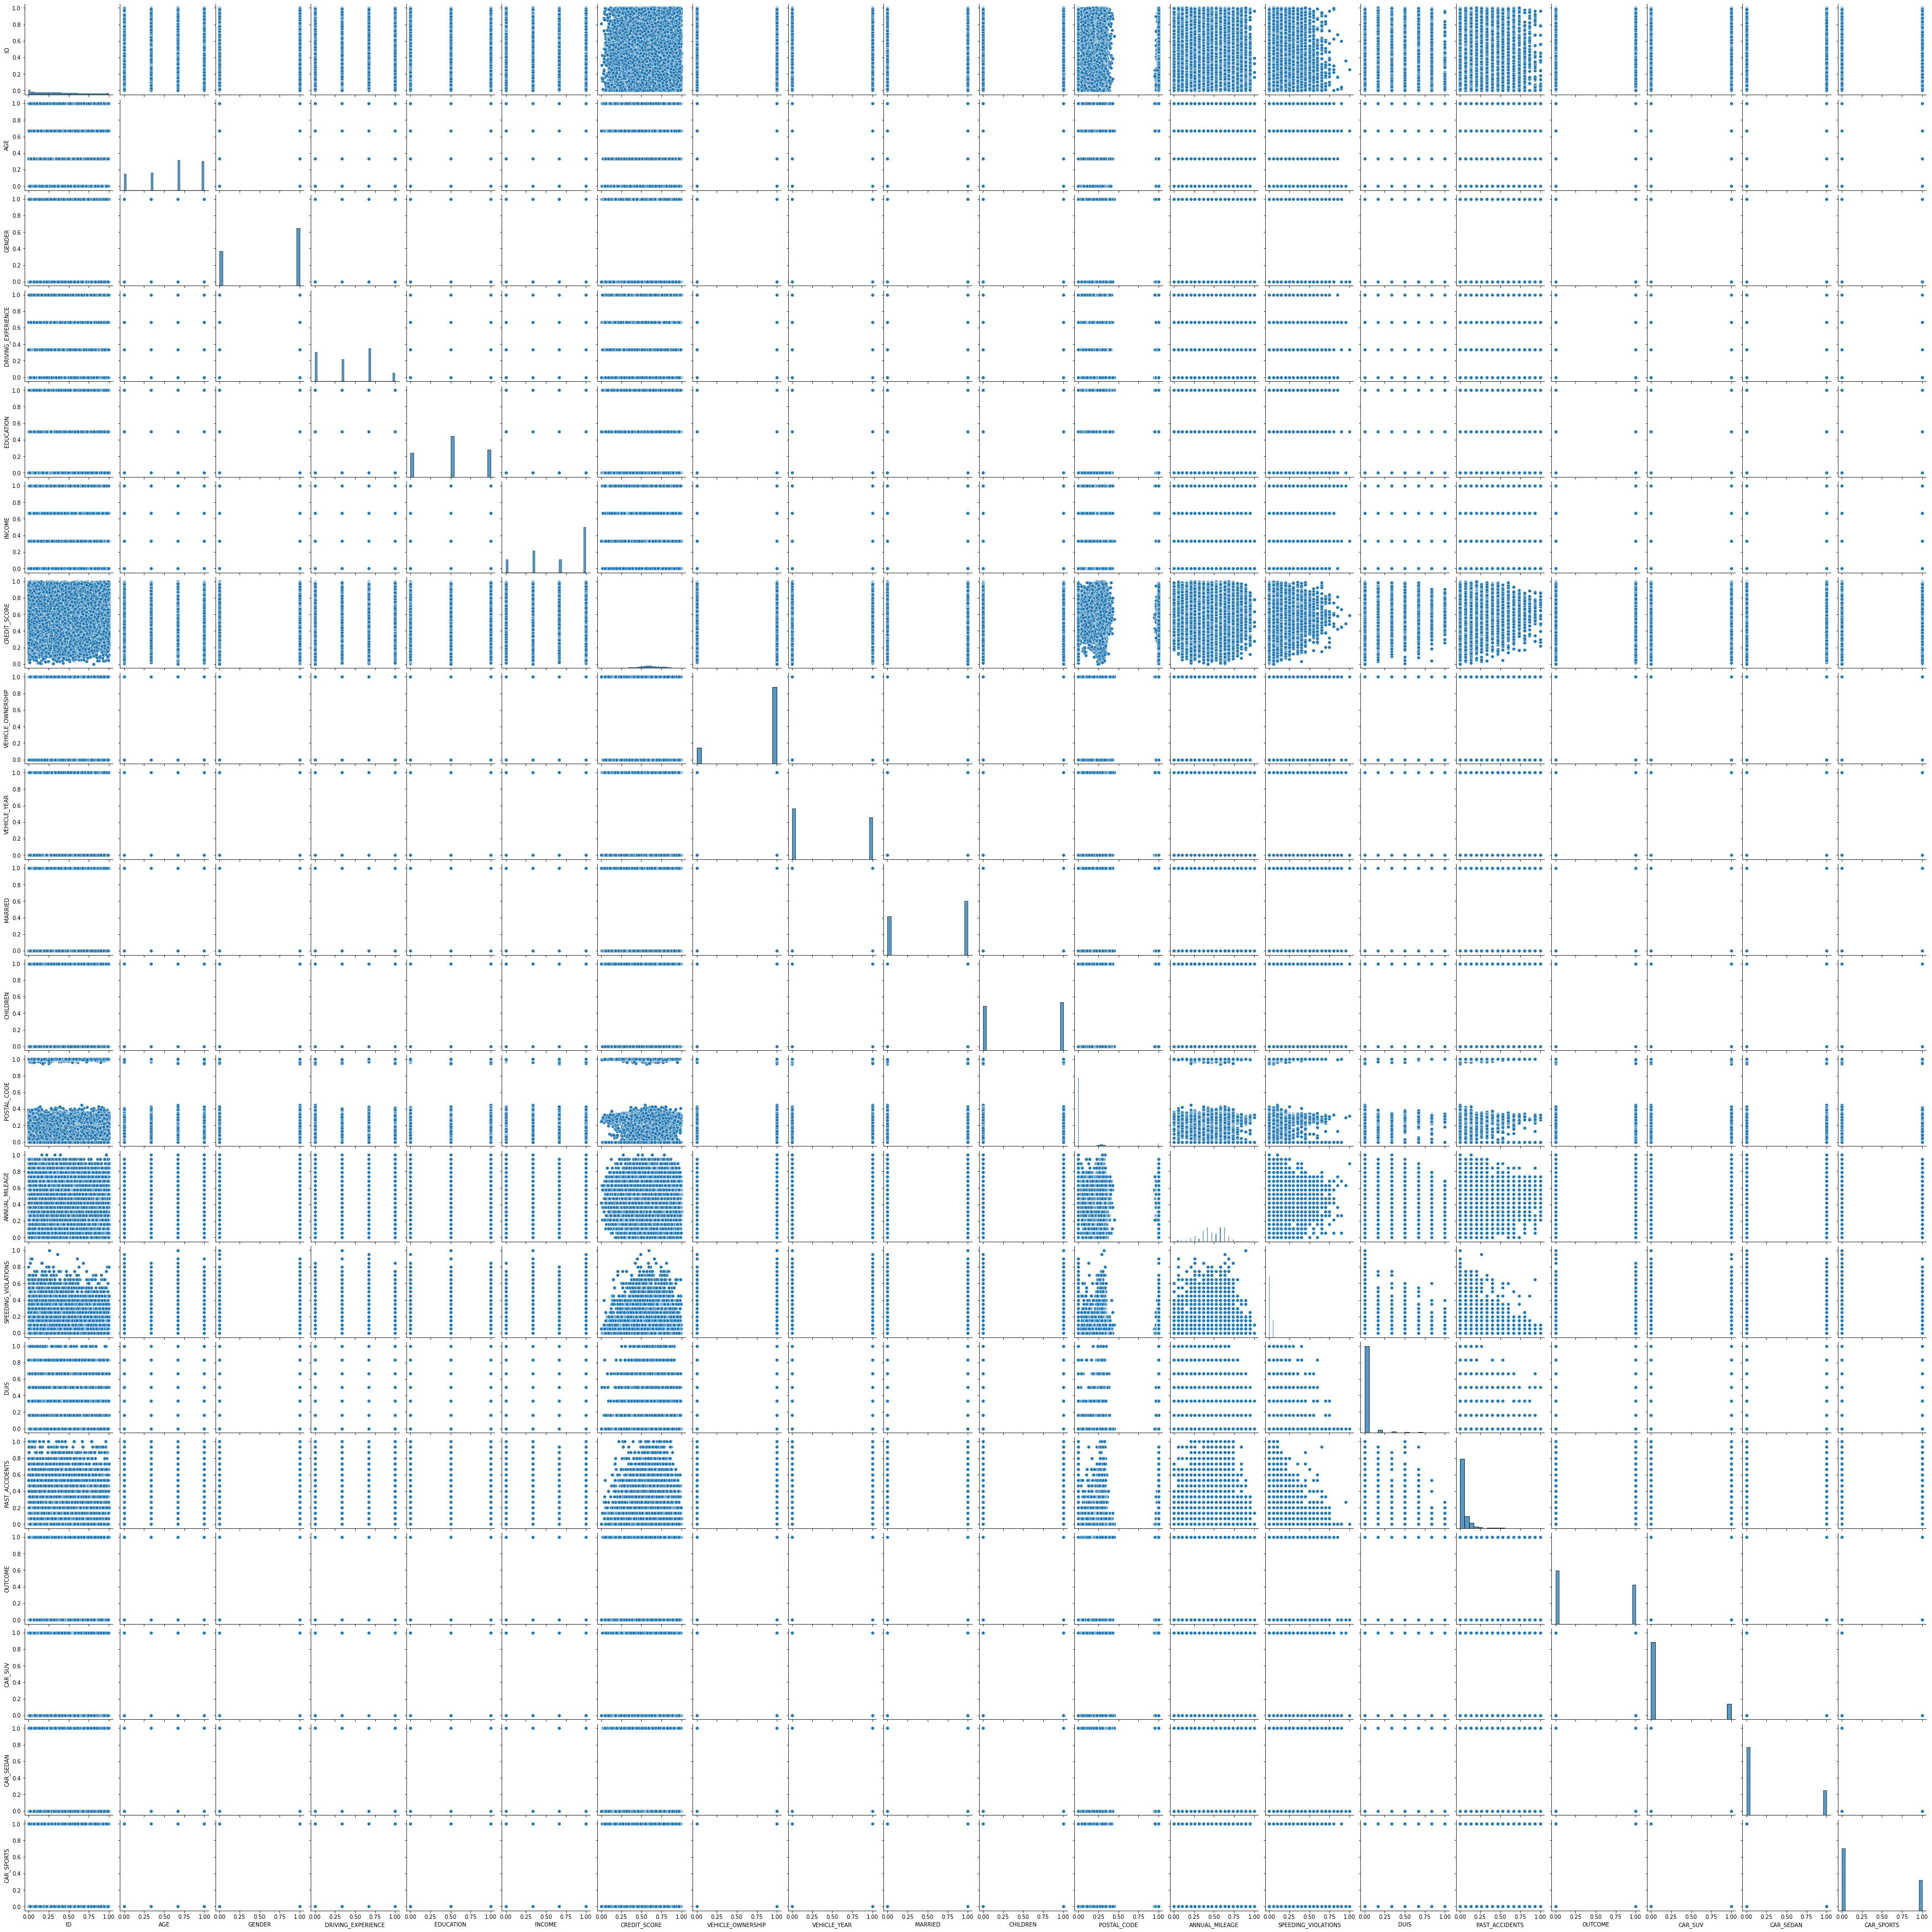

In [ ]:
sns.pairplot(df_final)

# Feature selection

## SelectKBest

In [ ]:
X.shape[1]

17

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Carregando os dados
# Separando o array em componentes de input e output
X = df_final.drop(columns=['ID', 'POSTAL_CODE', 'OUTCOME'], axis=1).values
y = df_final['OUTCOME'].values

# Função para seleção de variáveis
model = SelectKBest(chi2, k=14).fit(X, y)

features = model.transform(X)

print(model.get_feature_names_out)

<bound method SelectorMixin.get_feature_names_out of SelectKBest(k=14, score_func=<function chi2 at 0x7fc94fa10cb0>)>


In [ ]:
features.shape

(105000, 14)

## SKlearn RFE

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

X = df_final.drop(columns=['ID', 'POSTAL_CODE', 'OUTCOME'], axis=1).values
y = df_final['OUTCOME'].values

model = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=42,objective='binary',
       metric='binary_logloss',)
rfe = RFE(model, step=1, n_features_to_select=14).fit(X, y)

y_pred=lgb_clf.predict_proba(df2_final_test,
                             num_iteration=lgb_clf.best_iteration_)[:,1]

## Feature importance

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_final.drop(columns=['ID', 'POSTAL_CODE', 'OUTCOME'], axis=1)
y = df_final['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

model  = RandomForestClassifier()
model.fit(X_train, y_train)# Mostrando importância de cada feature
model.feature_importances_

array([0.06840034, 0.01481453, 0.05886949, 0.04789195, 0.06240576,
       0.32322844, 0.02385133, 0.03142313, 0.02946485, 0.03150145,
       0.14613715, 0.01112106, 0.01684346, 0.01904646, 0.0934732 ,
       0.0215274 ])

## PCA

In [ ]:
# Feature Extraction

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

X = train.drop(columns=['ID', 'POSTAL_CODE', 'OUTCOME'], axis=1).values
y = train['OUTCOME'].values

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Seleção de atributos
pca = PCA(n_components = 17)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.13207639 0.11039648 0.10951392 0.10738096 0.10386857 0.08740756
 0.06330108 0.06256884 0.06126098 0.05651047 0.0480467  0.02590829
 0.01098291 0.01052811 0.00426999 0.00386419 0.00211454]
[[-5.77585748e-03 -3.26789645e-02 -8.53221833e-05 -1.46760389e-03
  -5.52366624e-03  8.02350502e-04  4.40058550e-04  2.11972773e-02
   6.94349921e-03  1.63345514e-02  2.67215128e-04 -6.36294727e-05
   2.00145652e-05 -2.11769959e-04 -9.00750881e-02 -6.25910866e-01
   7.73448645e-01]
 [-2.27462576e-03  1.17955784e-03  1.35754220e-03 -3.66558343e-03
   1.36782044e-02  8.45054869e-05 -1.07214002e-02  3.03024793e-02
   8.36935140e-02 -9.94954698e-01 -1.84739458e-03 -1.52548695e-04
  -3.93980497e-04  1.20656072e-03  3.02492714e-02 -2.99502222e-02
  -1.15286841e-03]
 [ 3.83398116e-03  4.31840511e-02  5.48095488e-03 -2.32404119e-03
  -1.87086125e-03  4.04724781e-03 -3.71658540e-03  9.97864566e-01
  -2.48614925e-02  2.71246789e-02  2.16270920e-03 -1.54407891e-03
   1.03333212e-03  8.79040001e-05 

# Avaliando modelos

## LGBMClassifier


In [ ]:
df2_final_test = df_final_test.drop(columns=['POSTAL_CODE', 'ID'], axis=1)

X = df_final.drop(columns=['POSTAL_CODE', 'ID', 'OUTCOME'], axis=1)
y = df_final['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=7)

lgb_clf = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=7,objective='binary',
       metric='binary_logloss',)

lgb_clf.fit(X_train, y_train,  eval_set=(X_test, y_test), early_stopping_rounds=500)

y_pred=lgb_clf.predict_proba( X_test,
                             num_iteration=lgb_clf.best_iteration_)[:,1]

[1]	valid_0's binary_logloss: 0.679956
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's binary_logloss: 0.679958
[3]	valid_0's binary_logloss: 0.679962
[4]	valid_0's binary_logloss: 0.679965
[5]	valid_0's binary_logloss: 0.679964
[6]	valid_0's binary_logloss: 0.679961
[7]	valid_0's binary_logloss: 0.679961
[8]	valid_0's binary_logloss: 0.679961
[9]	valid_0's binary_logloss: 0.679964
[10]	valid_0's binary_logloss: 0.679963
[11]	valid_0's binary_logloss: 0.679965
[12]	valid_0's binary_logloss: 0.679963
[13]	valid_0's binary_logloss: 0.679969
[14]	valid_0's binary_logloss: 0.679967
[15]	valid_0's binary_logloss: 0.679968
[16]	valid_0's binary_logloss: 0.679964
[17]	valid_0's binary_logloss: 0.679966
[18]	valid_0's binary_logloss: 0.679963
[19]	valid_0's binary_logloss: 0.679963
[20]	valid_0's binary_logloss: 0.679961
[21]	valid_0's binary_logloss: 0.679963
[22]	valid_0's binary_logloss: 0.679964
[23]	valid_0's binary_logloss: 0.679965
[24]	valid_0's binary_logl

## Cross validation com LGBMClassifier


In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

df2_final_test = df_final_test.drop(columns=['POSTAL_CODE', 'ID'], axis=1)

X = df_final.drop(columns=['POSTAL_CODE', 'ID', 'OUTCOME'], axis=1)
y = df_final['OUTCOME']

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, random_state = seed, shuffle=True)

# Criando o modelo
modelo = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=7,objective='binary',
       metric='binary_logloss',)

resultado = cross_val_score(modelo, X, y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 57.633%


# XGBoost Classifier

In [ ]:
import xgboost as xgb

from sklearn.metrics import accuracy_score

In [ ]:
X=train.loc[:,((train.columns!='OUTCOME') & (train.columns!='ID') & (train.columns!='POSTAL_CODE'))].values[:,1:]
X = X.astype('float32')

y=train.loc[:,'OUTCOME'].values
y = y.astype('float32')

print(y[y==1].shape[0], y[y==0].shape[0])

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

44378 60622


In [ ]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01, n_estimators=500, random_state=42,objective='binary',
       metric='binary_logloss',)

xgb_clf.fit(X_train, y_train,  eval_set=(X_test, y_test), early_stopping_rounds=500)

# y_pred=xgb_clf.predict_proba(df2_final_test,
#                              num_iteration=xgb_clf.best_iteration_)[:,1]

ValueError: ignored

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model=xgb.XGBClassifier(learning_rate=0.01, n_estimators=1000)

evals_result = []
model.fit(X_train,y_train, eval_metric='logloss', eval_set=(X_test, y_test),  early_stopping_rounds=500)

y_pred=model.predict_proba(X_test)

ValueError: ignored

In [ ]:
y_1 = np.array(y_pred[:,1])

In [ ]:
log_loss(y_test, y_pred[:,1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.77659136>

## Regressao Logistica

In [ ]:
import tensorflow as tf

def log_loss(y_pred, y):
  # Compute the log loss function
  ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(ce)

X = df_final
X = X.drop(columns=['OUTCOME','POSTAL_CODE', 'ID'])
y = train['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

clf = LogisticRegression(solver='newton-cg', penalty='l2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
log_loss(y_pred, y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=0.6931471805599464>

### Teste

In [ ]:
df2_final_test = df_final_test.drop(columns=['POSTAL_CODE', 'ID'])
ypred = clf.predict(df2_final_test)

In [ ]:
y_pred.mean()

0.4222050008966199

# Submission

In [ ]:
submission = pd.DataFrame({"OUTCOME":y_pred})
submission.to_csv('sub_dspsplus_permileall_42.csv', index=False)

In [ ]:
last = pd.read_csv('/content/submission_LG_01.csv')

In [ ]:
last.loc[last['OUTCOME'] < 0.41] *= 0.913

In [ ]:
last.loc[last['OUTCOME'] > 0.44]

,OUTCOME
81,0.514045
145,0.442878
173,0.440245
248,0.442209
322,0.444450
...,...
44125,0.444645
44261,0.462280
44772,0.452183
44905,0.441149


In [ ]:
last.to_csv('submission5.csv', index=False)